# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
parameter_1 = 'q='
parameter_2 = '&appid='
#url = f"{base_url}{parameter_1}{query}{parameter_2}{weather_api_key}"
#print (url)#

In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []
units = "Metric"
parameter_3 = '&units='

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{parameter_1}{city}{parameter_2}{weather_api_key}{parameter_3}{units}"
    print (city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=hermanus&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 1 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=busselton&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 2 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?q=komyshnya&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 3 of Set 1 | komyshnya
http://api.openweathermap.org/data/2.5/weather?q=olinda&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 4 of Set 1 | olinda
http://api.openweathermap.org/data/2.5/weather?q=thompson&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 5 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?q=tiksi&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 6 of Set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?q=shingu&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 3 of Set 2 | shingu
http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 4 of Set 2 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=kapaa&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 5 of Set 2 | kapaa
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 6 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=kemijarvi&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 7 of Set 2 | kemijarvi
http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 8 of Set 2 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?q=dryden&appid=7a377ca36b94f99bc3a054d1b4

http://api.openweathermap.org/data/2.5/weather?q=vao&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 9 of Set 3 | vao
http://api.openweathermap.org/data/2.5/weather?q=sitka&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 10 of Set 3 | sitka
http://api.openweathermap.org/data/2.5/weather?q=saint george&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 11 of Set 3 | saint george
http://api.openweathermap.org/data/2.5/weather?q=tumannyy&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 12 of Set 3 | tumannyy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=halifax&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 13 of Set 3 | halifax
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 14 of Set 3 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=bilibino&appid=7a377

http://api.openweathermap.org/data/2.5/weather?q=hualmay&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 13 of Set 4 | hualmay
http://api.openweathermap.org/data/2.5/weather?q=kitimat&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 14 of Set 4 | kitimat
http://api.openweathermap.org/data/2.5/weather?q=airai&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 15 of Set 4 | airai
http://api.openweathermap.org/data/2.5/weather?q=isangel&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 16 of Set 4 | isangel
http://api.openweathermap.org/data/2.5/weather?q=axim&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 17 of Set 4 | axim
http://api.openweathermap.org/data/2.5/weather?q=grand river south east&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 18 of Set 4 | grand river south east
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=namatanai

http://api.openweathermap.org/data/2.5/weather?q=leland&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 19 of Set 5 | leland
http://api.openweathermap.org/data/2.5/weather?q=san carlos de bariloche&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 20 of Set 5 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?q=pervomayskoye&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 21 of Set 5 | pervomayskoye
http://api.openweathermap.org/data/2.5/weather?q=castro&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 22 of Set 5 | castro
http://api.openweathermap.org/data/2.5/weather?q=san policarpo&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 23 of Set 5 | san policarpo
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 24 of Set 5 | kruisfontein
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?q=wick&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 22 of Set 6 | wick
http://api.openweathermap.org/data/2.5/weather?q=havoysund&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 23 of Set 6 | havoysund
http://api.openweathermap.org/data/2.5/weather?q=mehamn&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 24 of Set 6 | mehamn
http://api.openweathermap.org/data/2.5/weather?q=tual&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 25 of Set 6 | tual
http://api.openweathermap.org/data/2.5/weather?q=anadyr&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 26 of Set 6 | anadyr
http://api.openweathermap.org/data/2.5/weather?q=camana&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 27 of Set 6 | camana
http://api.openweathermap.org/data/2.5/weather?q=asuncion&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing

http://api.openweathermap.org/data/2.5/weather?q=alpena&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 29 of Set 7 | alpena
http://api.openweathermap.org/data/2.5/weather?q=ornskoldsvik&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 30 of Set 7 | ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?q=coahuayana&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 31 of Set 7 | coahuayana
http://api.openweathermap.org/data/2.5/weather?q=povenets&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 32 of Set 7 | povenets
http://api.openweathermap.org/data/2.5/weather?q=inirida&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 33 of Set 7 | inirida
http://api.openweathermap.org/data/2.5/weather?q=ofunato&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 34 of Set 7 | ofunato
http://api.openweathermap.org/data/2.5/weather?q=port-gentil&appid=7a377ca36b94f99bc3a054d

http://api.openweathermap.org/data/2.5/weather?q=atyrau&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 33 of Set 8 | atyrau
http://api.openweathermap.org/data/2.5/weather?q=yulara&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 34 of Set 8 | yulara
http://api.openweathermap.org/data/2.5/weather?q=katangli&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 35 of Set 8 | katangli
http://api.openweathermap.org/data/2.5/weather?q=marsh harbour&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 36 of Set 8 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?q=skierniewice&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 37 of Set 8 | skierniewice
http://api.openweathermap.org/data/2.5/weather?q=fuyu&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 38 of Set 8 | fuyu
http://api.openweathermap.org/data/2.5/weather?q=port augusta&appid=7a377ca36b94f99bc3a054d1

http://api.openweathermap.org/data/2.5/weather?q=rio gallegos&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 36 of Set 9 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?q=iracoubo&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 37 of Set 9 | iracoubo
http://api.openweathermap.org/data/2.5/weather?q=turukhansk&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 38 of Set 9 | turukhansk
http://api.openweathermap.org/data/2.5/weather?q=georgetown&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 39 of Set 9 | georgetown
http://api.openweathermap.org/data/2.5/weather?q=bud&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 40 of Set 9 | bud
http://api.openweathermap.org/data/2.5/weather?q=san carlos del zulia&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 41 of Set 9 | san carlos del zulia
http://api.openweathermap.org/data/2.5/weather?q=constitucion&ap

http://api.openweathermap.org/data/2.5/weather?q=quelimane&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 42 of Set 10 | quelimane
http://api.openweathermap.org/data/2.5/weather?q=george town&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 43 of Set 10 | george town
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 44 of Set 10 | san cristobal
http://api.openweathermap.org/data/2.5/weather?q=esperance&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 45 of Set 10 | esperance
http://api.openweathermap.org/data/2.5/weather?q=lolua&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 46 of Set 10 | lolua
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=balykshi&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 47 of Set 10 | balykshi
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?q=warqla&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 47 of Set 11 | warqla
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=sioux lookout&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 48 of Set 11 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?q=atar&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 49 of Set 11 | atar
http://api.openweathermap.org/data/2.5/weather?q=iguape&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 0 of Set 12 | iguape
http://api.openweathermap.org/data/2.5/weather?q=serula&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 1 of Set 12 | serula
http://api.openweathermap.org/data/2.5/weather?q=kanigoro&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 2 of Set 12 | kanigoro
http://api.openweathermap.org/data/2.5/weather?q=tripoli&appid=7a377ca36b

http://api.openweathermap.org/data/2.5/weather?q=mantua&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 3 of Set 13 | mantua
http://api.openweathermap.org/data/2.5/weather?q=pondicherry&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 4 of Set 13 | pondicherry
http://api.openweathermap.org/data/2.5/weather?q=gamba&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 5 of Set 13 | gamba
http://api.openweathermap.org/data/2.5/weather?q=san joaquin&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 6 of Set 13 | san joaquin
http://api.openweathermap.org/data/2.5/weather?q=mirnyy&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 7 of Set 13 | mirnyy
http://api.openweathermap.org/data/2.5/weather?q=mayor pablo lagerenza&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 8 of Set 13 | mayor pablo lagerenza
http://api.openweathermap.org/data/2.5/weather?q=truth or consequences

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,12.11,83,51,2.53,ZA,1680214989
1,busselton,-33.6500,115.3333,17.35,76,100,5.73,AU,1680214990
2,komyshnya,50.1859,33.6840,0.06,76,0,4.62,UA,1680214990
3,olinda,-8.0089,-34.8553,26.85,69,20,2.57,BR,1680214990
4,thompson,55.7435,-97.8558,-7.91,41,20,8.75,CA,1680214990


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,12.11,83,51,2.53,ZA,1680214989
1,busselton,-33.6500,115.3333,17.35,76,100,5.73,AU,1680214990
2,komyshnya,50.1859,33.6840,0.06,76,0,4.62,UA,1680214990
3,olinda,-8.0089,-34.8553,26.85,69,20,2.57,BR,1680214990
4,thompson,55.7435,-97.8558,-7.91,41,20,8.75,CA,1680214990


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

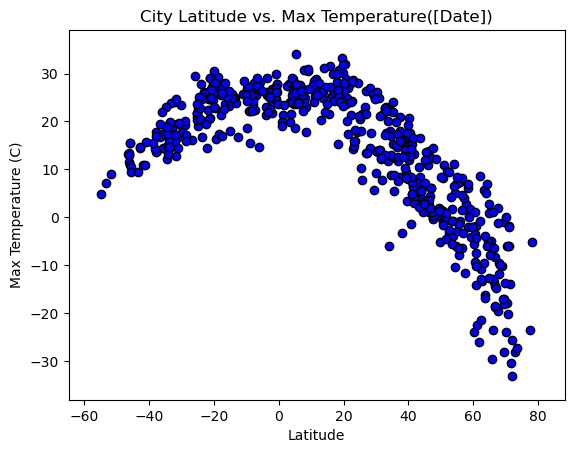

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature([Date])")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(min(city_data_df["Lat"])-10, max(city_data_df["Lat"])+10)
plt.ylim(min(city_data_df["Max Temp"])-5, max(city_data_df["Max Temp"])+5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

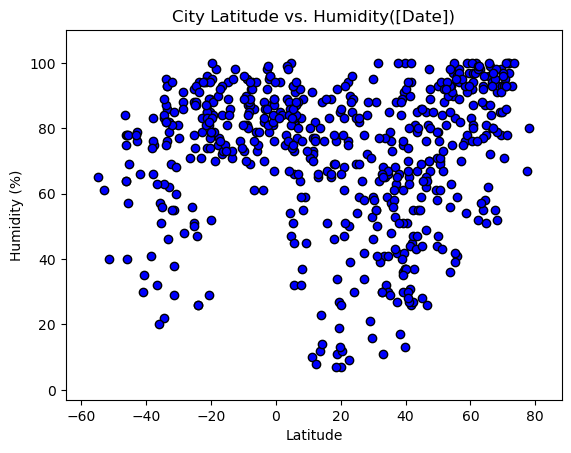

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity([Date])")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(city_data_df["Lat"])-10, max(city_data_df["Lat"])+10)
plt.ylim(min(city_data_df["Humidity"])-10, max(city_data_df["Humidity"])+10)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

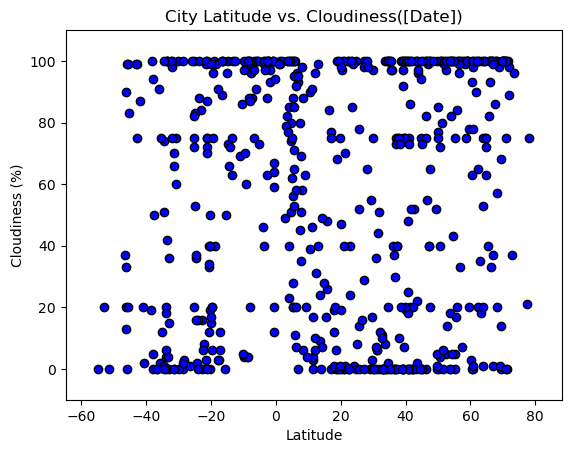

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness([Date])")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(city_data_df["Lat"])-10, max(city_data_df["Lat"])+10)
plt.ylim(min(city_data_df["Cloudiness"])-10, max(city_data_df["Cloudiness"])+10)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

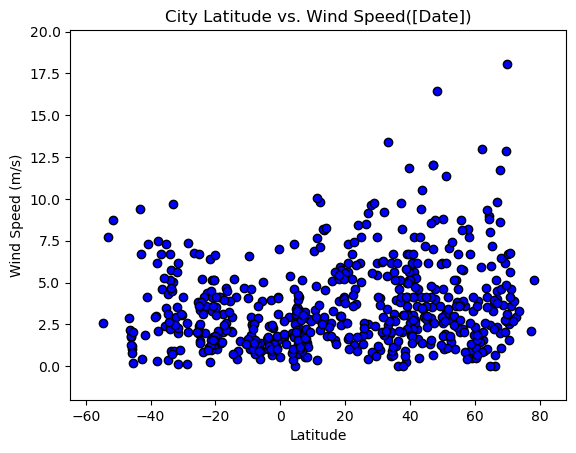

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed([Date])")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(min(city_data_df["Lat"])-10, max(city_data_df["Lat"])+10)
plt.ylim(min(city_data_df["Wind Speed"])-2, max(city_data_df["Wind Speed"])+2)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,komyshnya,50.1859,33.6840,0.06,76,0,4.62,UA,1680214990
4,thompson,55.7435,-97.8558,-7.91,41,20,8.75,CA,1680214990
5,tiksi,71.6872,128.8694,-30.51,100,100,2.74,RU,1680214990
6,bethel,41.3712,-73.4140,6.68,31,0,5.66,US,1680214991
7,khasan,42.4308,130.6434,6.35,55,0,1.64,RU,1680214991


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,12.11,83,51,2.53,ZA,1680214989
1,busselton,-33.6500,115.3333,17.35,76,100,5.73,AU,1680214990
3,olinda,-8.0089,-34.8553,26.85,69,20,2.57,BR,1680214990
8,saint-joseph,-21.3667,55.6167,24.71,85,72,3.44,RE,1680214991
12,port macquarie,-31.4333,152.9167,19.38,55,0,1.97,AU,1680214992


###  Temperature vs. Latitude Linear Regression Plot

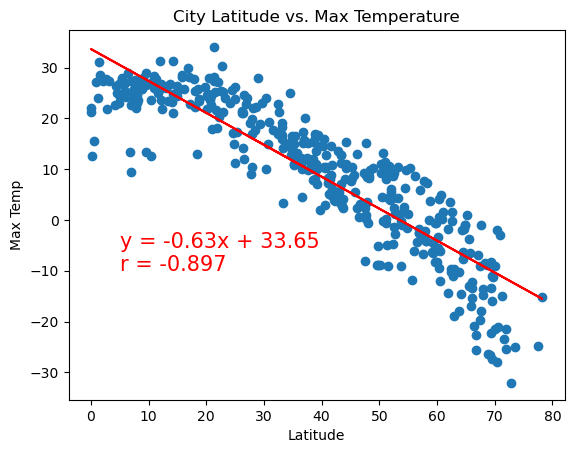

In [15]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
title = "City Latitude vs. Max Temperature"
text_coordinates = (5, -10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


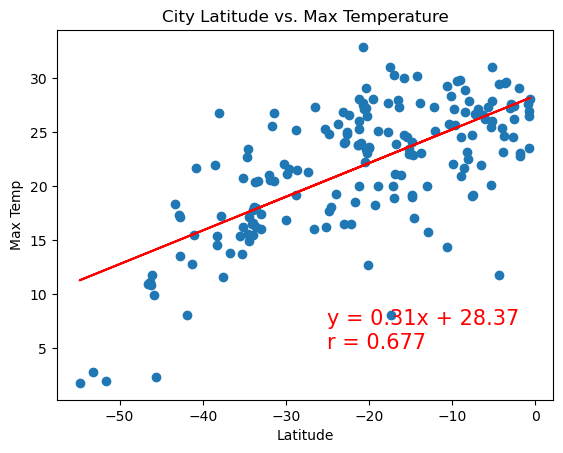

In [16]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
title = "City Latitude vs. Max Temperature"
text_coordinates = (-25, 5)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


**Discussion about the linear relationship:** 
Temperature vs Latitude Linear Regression on the Northern hemisphere shows a good correlation with a r value close to 1 while
on the Southern hemisphere there is a fair correlation with a r value of 0.68 but as good as the Northen Hemisphere specialy at the lowest Latitudes. Both Linear Regression shows the temperature increasing more to the zero latitude mark(Equator).

### Humidity vs. Latitude Linear Regression Plot

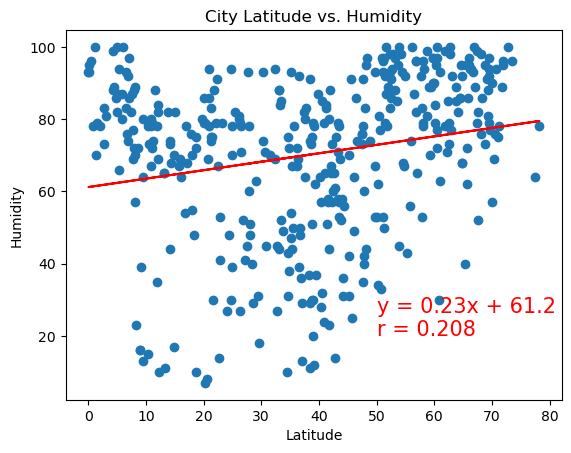

In [17]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
title = "City Latitude vs. Humidity"
text_coordinates = (50, 20)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


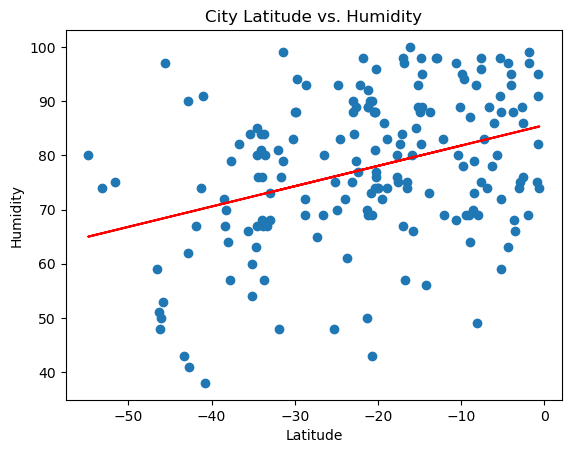

In [18]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
title = "City Latitude vs. Humidity"
text_coordinates = (-25, 50)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


**Discussion about the linear relationship:**
City Latitude vs Humidity does not have a good correlation in both Hemispheres. The R values in both plots are closer to zero and the plot shows there is not much relationship between Latitudes and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

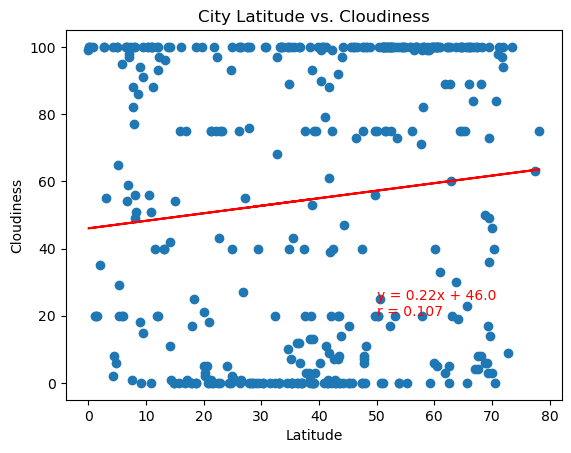

In [19]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=10, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
title = "City Latitude vs. Cloudiness"
text_coordinates = (50, 20)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


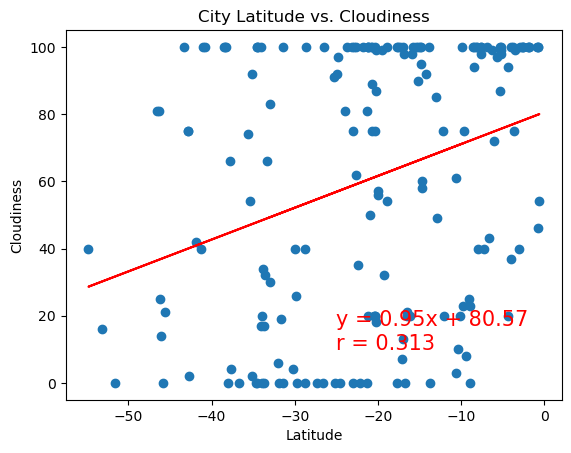

In [20]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
title = "City Latitude vs. Cloudiness"
text_coordinates = (-25, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


**Discussion about the linear relationship:** 
City Latitude vs Cloudiness does not have a good correlation in both Hemispheres. The R values in both plots are closer to zero and the plot shows there is not much relationship between Latitudes and Cloudiness. The markers are scattered all over the plot showing very little correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

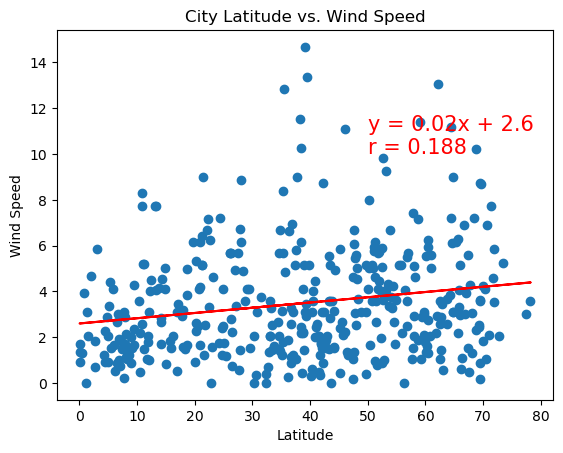

In [21]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
title = "City Latitude vs. Wind Speed"
text_coordinates = (50, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


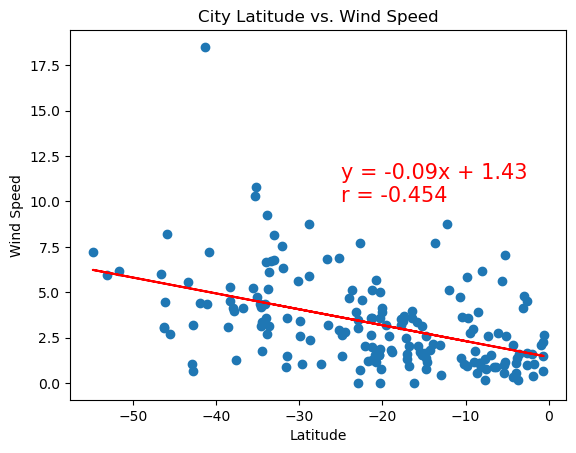

In [22]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
title = "City Latitude vs. Wind Speed"
text_coordinates = (-25, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


**Discussion about the linear relationship:** 
City Latitude vs Wind speed does not have a good correlation in both Hemispheres. The R values in both plots are closer to zero and the plot shows there is not much relationship between Latitudes and Wind speed. The Southern hemisphere does show better correlation between these two values than the Northern Hemisphere. However this could be due to external factors such a cities being closer to the ocean when we move closer to zero latitude due to the high temperatures.